In [30]:
import pandas as pd

In [31]:
data_dir = '/home/yicheng.wang/UCL-Dissertation/data/'

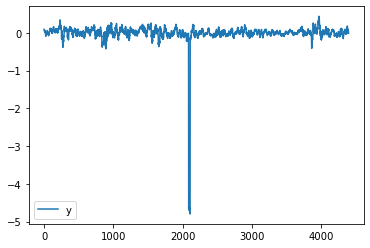

In [23]:
df = pd.read_csv(data_dir + 'silver/silver_input.csv', header=2)
df = df.rename(columns = {'Unnamed: 0':'date'})
df = df[1:]

df_target = pd.read_csv(data_dir + 'silver/silver_target.csv')

select_date = '2005-05-01'
df_features = df[df['date'] >= select_date].reset_index(drop=True)

# null features
null_features = df_features.columns[df_features.loc[0].isnull().squeeze()]

# features dataframe 
df_features = df_features.drop(columns=null_features)

# target dataframe
df_target = df_target[df_target['date'] >= select_date].reset_index(drop=True)

df_target.plot()

df_merge = pd.merge(df_features,df_target, on='date')

In [21]:
df_merge.to_csv('dataset/2009-2022-rebar_shfe.csv', index=False)

<AxesSubplot:xlabel='date'>

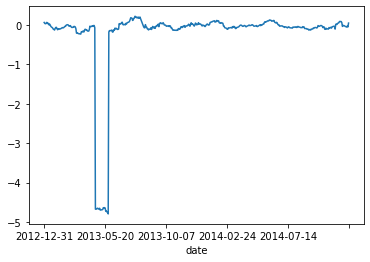

In [29]:
# df_merge = df_merge.set_index('date')
df_merge['y'][2000:2500].plot()

In [7]:
df = pd.read_csv(data_dir + 'cobalt/cobalt_feature.csv', header=2)

In [8]:
df

,Unnamed: 0,lme,cta_signal_fs,cta_signal_fs_fast,timespread,timespread_risk_adjusted,convergence_22,congolese_franc_spot,euro_spot,canadian_dollar_spot,...,china_caixin_pmi,germany_pmi,japan_pmi,us_pmi,china_gdp_agr,germany_gdp_agr,pct_change_indpro_us,japan_gdp_agr,us_gdp_agr,ewma_cross
0,date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-05-19,NaN,NaN,NaN,-0.002715,-0.000013,0.014677,-1.270161,-0.506786,0.127398,...,NaN,0.001163,0.000491,NaN,12.196598,-2.072342,-4.486772,-2.115183,0.270181,NaN
2,2010-05-20,NaN,NaN,NaN,-0.002724,-0.000013,0.014576,-0.944709,-0.467572,0.281378,...,NaN,0.001157,0.000487,NaN,12.197039,-2.055242,-4.438437,-2.088637,0.296258,0.000000e+00
3,2010-05-21,NaN,NaN,NaN,-0.002733,-0.000013,0.014416,-0.928650,-0.388817,0.208713,...,NaN,0.001151,0.000484,NaN,12.197422,-2.038207,-4.390341,-2.062197,0.321823,1.111254e-06
4,2010-05-24,NaN,NaN,NaN,-0.002740,-0.000012,0.014214,-0.913090,-0.510859,0.229902,...,NaN,0.001145,0.000480,NaN,12.197756,-2.021235,-4.342482,-2.035861,0.346888,7.095230e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,2022-02-23,-0.731620,0.376314,0.423007,-0.002148,0.000021,-0.003744,-0.332820,-0.032065,0.038225,...,-0.000155,0.000226,0.000306,-0.000448,4.004040,0.794434,2.904229,0.234996,5.709419,8.323838e-05
3072,2022-02-24,-0.732367,0.373514,0.416495,-0.002764,0.000020,-0.003541,-0.335740,-0.111031,0.075544,...,-0.000154,0.000225,0.000304,-0.000444,4.003517,0.798194,2.905690,0.235649,5.705313,8.573260e-05
3073,2022-02-25,-0.732305,0.370089,0.411328,-0.003379,0.000019,-0.003359,-0.357296,-0.055710,0.022802,...,-0.000153,0.000224,0.000301,-0.000441,4.003062,0.801941,2.907144,0.236298,5.701287,8.479324e-05
3074,2022-02-28,-0.732244,0.367145,0.408340,-0.003991,0.000018,-0.003238,-0.359456,-0.086427,0.007873,...,-0.000023,0.000057,0.000056,-0.000097,4.002665,0.805673,2.929827,0.236945,5.697339,8.385058e-05


In [ ]:
def correlationLoss(x,y, axis=-2):
    #     """Loss function that maximizes the pearson correlation coefficient between the predicted values and the labels,
    # while trying to have the same mean and variance"""
    x = tf.convert_to_tensor(x)
    y = math_ops.cast(y, x.dtype)
    n = tf.cast(tf.shape(x)[axis], x.dtype)
    xsum = tf.reduce_sum(x, axis=axis)
    ysum = tf.reduce_sum(y, axis=axis)
    xmean = xsum / n
    ymean = ysum / n
    xsqsum = tf.reduce_sum( tf.math.squared_difference(x, xmean), axis=axis)
    ysqsum = tf.reduce_sum( tf.math.squared_difference(y, ymean), axis=axis)
    cov = tf.reduce_sum( (x - xmean) * (y - ymean), axis=axis)
    corr = cov / tf.sqrt(xsqsum * ysqsum)
    # absdif = tmean(tf.abs(x - y), axis=axis) / tf.sqrt(yvar)
    sqdif = tf.reduce_sum(tf.math.squared_difference(x, y), axis=axis) / n / tf.sqrt(ysqsum / n)
    # meandif = tf.abs(xmean - ymean) / tf.abs(ymean)
    # vardif = tf.abs(xvar - yvar) / yvar
    # return tf.convert_to_tensor( K.mean(tf.constant(1.0, dtype=x.dtype) - corr + (meandif * 0.01) + (vardif * 0.01)) , dtype=tf.float32 )
    return tf.convert_to_tensor( K.mean(tf.constant(1.0, dtype=x.dtype) - corr + (0.01 * sqdif)) , dtype=tf.float32 )

In [34]:
df = pd.read_csv(data_dir + 'silver/silver_cme_prices.csv')

In [39]:
df = df[df.date >= '2005-05-01'].reset_index(drop=True)

<AxesSubplot:>

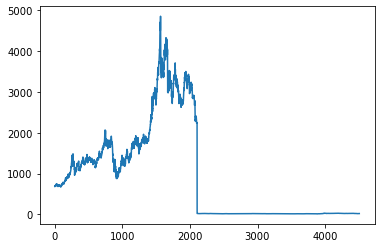

In [42]:
df['silver_cme_prices'].plot()

In [49]:
df[2100:2150]

,date,silver_cme_prices
2100,2013-05-20,2256.800
2101,2013-05-21,2244.200
2102,2013-05-22,2245.800
2103,2013-05-23,2249.400
2104,2013-05-24,2248.200
2105,2013-05-27,2248.200
2106,2013-05-28,22.180
2107,2013-05-29,22.445
2108,2013-05-30,22.674
2109,2013-05-31,22.228


df.loc[:2106, '']